# PyGrunn - `vaex` -  New York Taxi Dataset (2009-2015) EDA

In [1]:
import vaex
from vaex.ui.colormaps import cm_plusmin

import pylab as p
import numpy as np
import seaborn as sns

### Open the dataset

In [2]:
# Opens the data in hdf5 format
df = vaex.open('./data/yellow_taxi_2009_2015_f32.hdf5')

# check length
len(df)

1173057927

In [3]:
# View a portion of the dataset
df.head_and_tail_print()

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.350000381469727,-74.0025863647461,40.73974609375,nan,nan,-73.86997985839844,40.770225524902344,23.700000762939453,0.0,nan,4.739999771118164,0.0,28.440000534057617
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


In [4]:
# Basic insights about the contents of the dataset
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
dtype,str,datetime64[ns],datetime64[ns],int64,str,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057926,1002161871,638914438,1173043432,1173050240,1173057925,1173057925,1032017356,1173057925,1173057925,1173057925
missing,0,0,0,0,0,0,0,1,170896056,534143489,14495,7687,2,2,141040571,2,2,2
mean,--,1970-01-01T00:00:01.953533625,1970-01-01T00:00:14.506598422,1,--,3.6146034789976746,-21.978726293539637,10.987688872237328,0.2758268658975951,0.017168377090266976,-21.97717692007844,10.986262030857263,6.334668856186279,0.17207858171198154,0.09754629746750113,0.8387885193307909,0.1896596947674174,6.962770176928816
std,--,6.22239e+16,6.22266e+16,1.33032,--,7756.52,12.7505,9.51675,0.441996,0.129899,12.6768,9.50487,633.505,0.395407,0.0683994,132.842,886.718,1098.43
min,--,2009-01-01T00:00:27.365015552,1899-12-31T23:59:43.370698752,0,--,-4.08401e+07,-3509.02,-3579.14,0,0,-3579.14,-3579.14,-2.14748e+07,-79,-3,-1.67772e+06,-2.14748e+07,-2.14748e+07
max,--,2016-01-01T00:00:49.632313344,2253-08-23T08:00:13.061652480,255,--,1.98623e+08,3570.22,3577.14,252,2,3460.43,3577.14,825999,999.99,1311.22,3.95059e+06,5510.07,3.95061e+06


### Remove missing data

In [5]:
# Drop NANs
df = df.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])

### Abnormal number of passengers

In [6]:
# Number of passengers
df.passenger_count.unique()

array([  5,   2,   6,   1,   3,   4,   0, 113, 208, 129,   9, 255, 165,
         7,  49,  10,  19,  15,  33,  36,  58,   8, 254,  65,  37,  17,
        84, 164,  34,  66, 247, 250, 177, 125,  61, 134,  38, 232,  13,
        51, 213,  91, 158,  69, 133, 225,  70, 141, 211,  97, 137, 160,
       193,  53, 223, 169, 229,  25, 155, 249, 163,  47])

In [7]:
# Filter abnormal number of passengers
df = df[(df.passenger_count>0) & (df.passenger_count<10)]

### Clean up distance values

In [8]:
# Value counts for trip distance
df.trip_distance.value_counts(progress=True).head(31)

[########################################]:  100.00% elapsed time  :       13s =  0.2m =  0.0h
 

1.0    27083389
0.9    26588089
0.8    26038046
1.1    25716466
1.2    24680498
0.7    24234703
1.3    23392640
1.4    22215783
0.6    21053233
1.5    20994417
1.6    19793327
1.7    18508123
1.8    17264392
0.5    16533108
1.9    16079125
2.0    15374956
2.1    13934013
2.2    12950485
2.3    12016568
2.4    11192103
0.4    11149327
2.5    10438588
2.6     9757215
2.7     9123064
2.8     8548061
2.9     7964762
0.0     7845039
3.0     7614675
3.1     6996287
3.2     6571840
3.3     6169604
dtype: int64

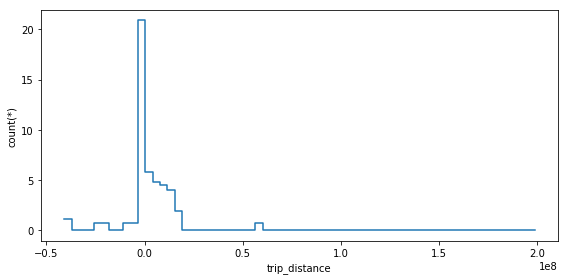

In [9]:
p.figure(figsize=(8,4))
df.plot1d('trip_distance', limits='minmax', f='log1p')
p.show()

In [10]:
# What is the largest distance?
df.trip_distance.max()

array(1.98623e+08, dtype=float32)

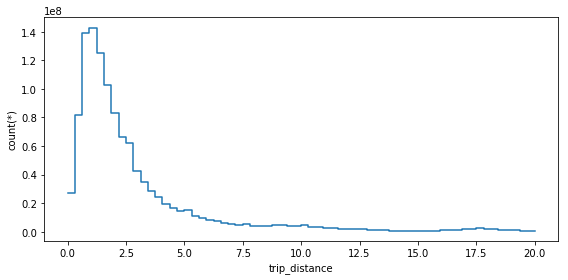

In [11]:
p.figure(figsize=(8,4))
df.plot1d('trip_distance', limits=[0, 20], f=None)
p.show()

In [12]:
# Filter negative and too large distances
df = df[(df.trip_distance>0) & (df.trip_distance<10)]

### What is _New York City_?

In [13]:
# Interactively plot the pickup locations
df.plot_widget(df.pickup_longitude, df.pickup_latitude, shape=512, f='log1p', colormap='plasma', limits='minmax')

In [14]:
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

In [15]:
df = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
        (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
        (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
        (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]

### Create some features

In [16]:
# Speed (miles per hour)
df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))

# Time in transit (minutes)
df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'm')

# fare divided by distance
df['fare_by_distance'] = (df.fare_amount / df.trip_distance)#.jit_numba()

### More filters - Trip duration?

<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in less


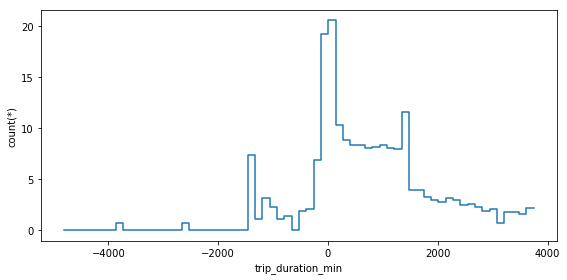

In [17]:
p.figure(figsize=(8,4))
df.plot1d('trip_duration_min', f='log1p', limits='95%')
p.show()

In [18]:
# Filter, keep durations that are within 5 hours
df = df[(df.trip_duration_min>0) & (df.trip_duration_min<300)]

### Create some time/date features

In [19]:
# Daily activities
df['pu_hour'] = df.pickup_datetime.dt.hour
df['pu_day_of_week'] = df.pickup_datetime.dt.dayofweek
df['pu_month'] = df.pickup_datetime.dt.month - 1

# lists to help with the labeling
weekday_names_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_names_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [20]:
# Treat these columns as label/ordinal encoded values
df.categorize(column='pu_hour')
df.categorize(column='pu_month')
df.categorize(column='pu_day_of_week')

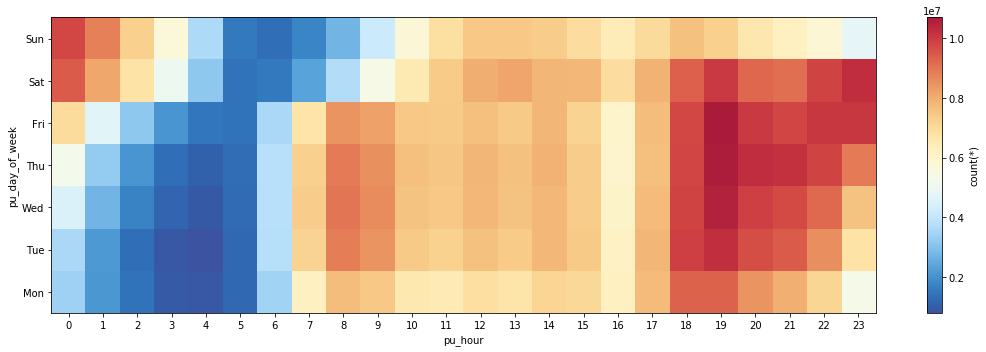

In [21]:
df.plot('pu_hour', 'pu_day_of_week', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
p.xticks(np.arange(24))
p.yticks(np.arange(7), weekday_names_list)
p.show()

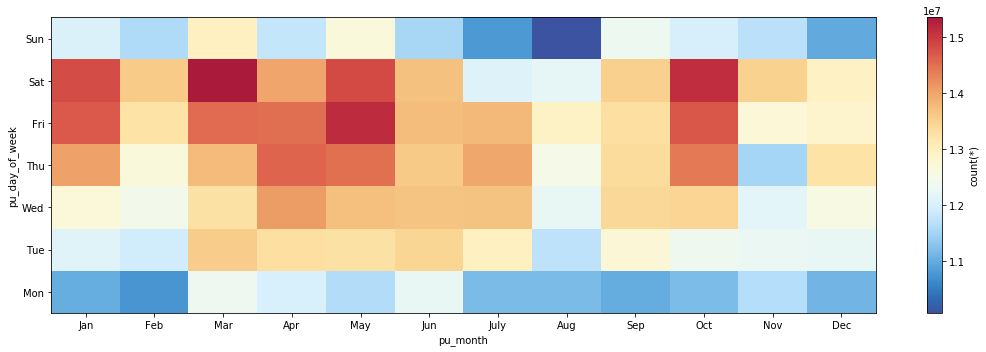

In [22]:
df.plot('pu_month', 'pu_day_of_week', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
p.xticks(np.arange(12), month_names_list)
p.yticks(np.arange(7), weekday_names_list)
p.show()

### Groupby examples

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


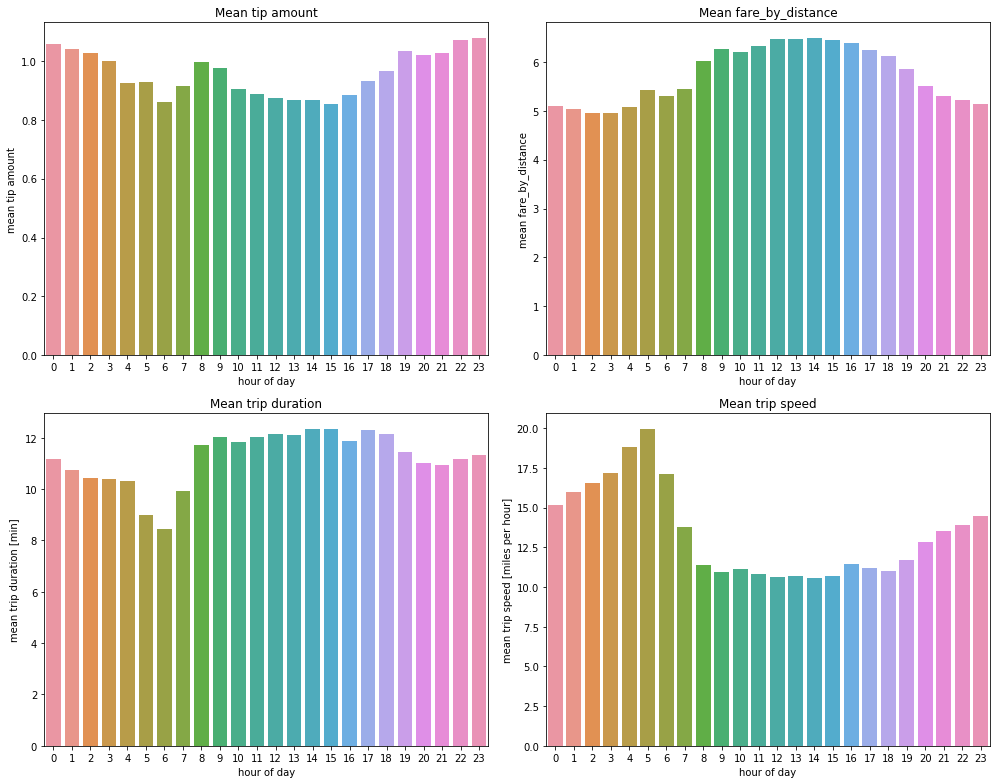

In [23]:
df_per_hour = df.groupby(by=df.pu_hour).agg({'fare_amount': 'mean',
                                             'tip_amount': 'mean',
                                             'fare_by_distance': 'mean',
                                             'trip_duration_min': 'mean',
                                             'trip_speed_mph': 'mean',
                                            })

p.figure(figsize=(14, 11))

p.subplot(221)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.tip_amount.values)
p.title('Mean tip amount')
p.xlabel('hour of day')
p.ylabel('mean tip amount')

p.subplot(222)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.fare_by_distance.values)
p.title('Mean fare_by_distance')
p.xlabel('hour of day')
p.ylabel('mean fare_by_distance')

p.subplot(223)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.trip_duration_min.values)
p.title('Mean trip duration')
p.xlabel('hour of day')
p.ylabel('mean trip duration [min]')

p.subplot(224)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.trip_speed_mph.values)
p.title('Mean trip speed')
p.xlabel('hour of day')
p.ylabel('mean trip speed [miles per hour]')


p.tight_layout()
p.show()

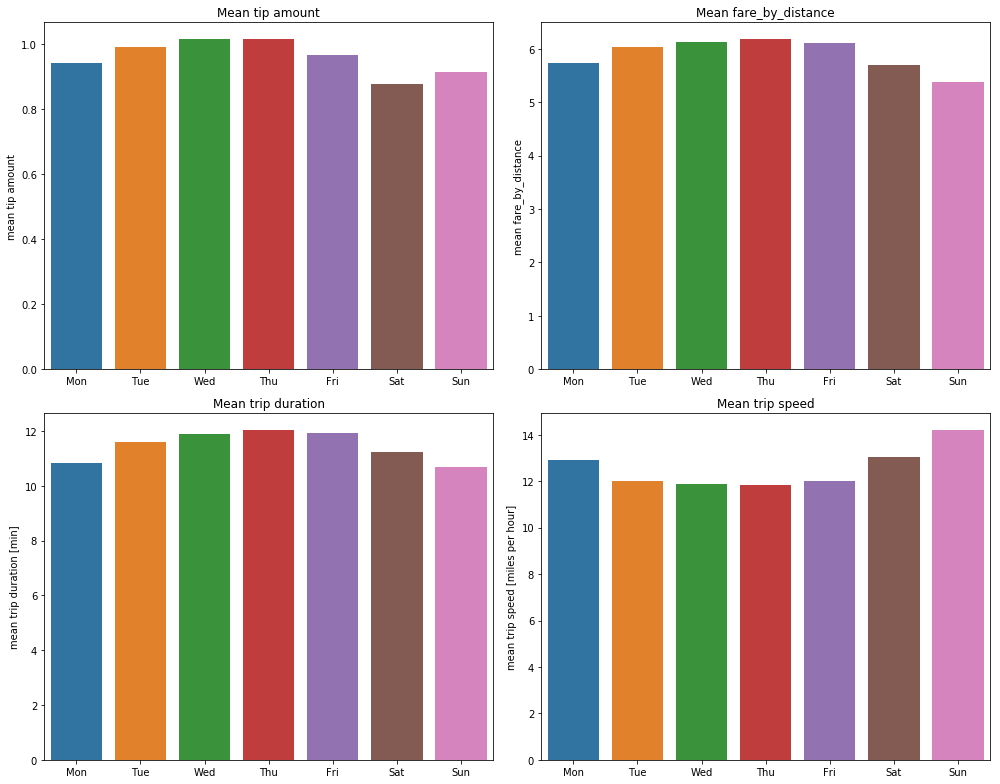

In [24]:
df_per_day = df.groupby(by=df.pu_day_of_week).agg({'fare_amount': 'mean',
                                                   'tip_amount': 'mean',
                                                   'trip_distance': 'mean',
                                                   'fare_by_distance': 'mean',
                                                   'trip_duration_min': 'mean',
                                                   'trip_speed_mph': 'mean',
                                                  })

p.figure(figsize=(14, 11))

p.subplot(221)
sns.barplot(x=df_per_day.pu_day_of_week.values, y=df_per_day.tip_amount.values)
p.title('Mean tip amount')
p.xlabel('')
p.ylabel('mean tip amount')
p.xticks(ticks=np.arange(7), labels=weekday_names_list)

p.subplot(222)
sns.barplot(x=df_per_day.pu_day_of_week.values, y=df_per_day.fare_by_distance.values)
p.title('Mean fare_by_distance')
p.xlabel('')
p.ylabel('mean fare_by_distance')
p.xticks(ticks=np.arange(7), labels=weekday_names_list)

p.subplot(223)
sns.barplot(x=df_per_day.pu_day_of_week.values, y=df_per_day.trip_duration_min.values)
p.title('Mean trip duration')
p.xlabel('')
p.ylabel('mean trip duration [min]')
p.xticks(ticks=np.arange(7), labels=weekday_names_list)

p.subplot(224)
sns.barplot(x=df_per_day.pu_day_of_week.values, y=df_per_day.trip_speed_mph.values)
p.title('Mean trip speed')
p.xlabel('')
p.ylabel('mean trip speed [miles per hour]')
p.xticks(ticks=np.arange(7), labels=weekday_names_list)


p.tight_layout()
p.show()

### Density Maps

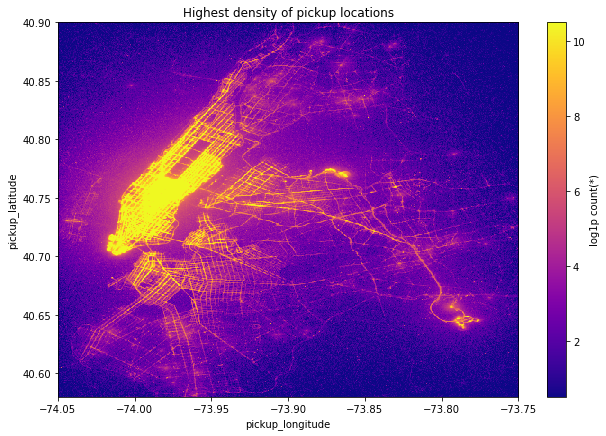

In [25]:
# Overall density map of pickup locations
p.figure(figsize=(9, 6))
df.plot(df.pickup_longitude, df.pickup_latitude, 
        limits='minmax',
        colorbar=True, colormap='plasma', f='log1p', shape=512, vmin=0.5, vmax=10.5)
p.title('Highest density of pickup locations')
p.show()

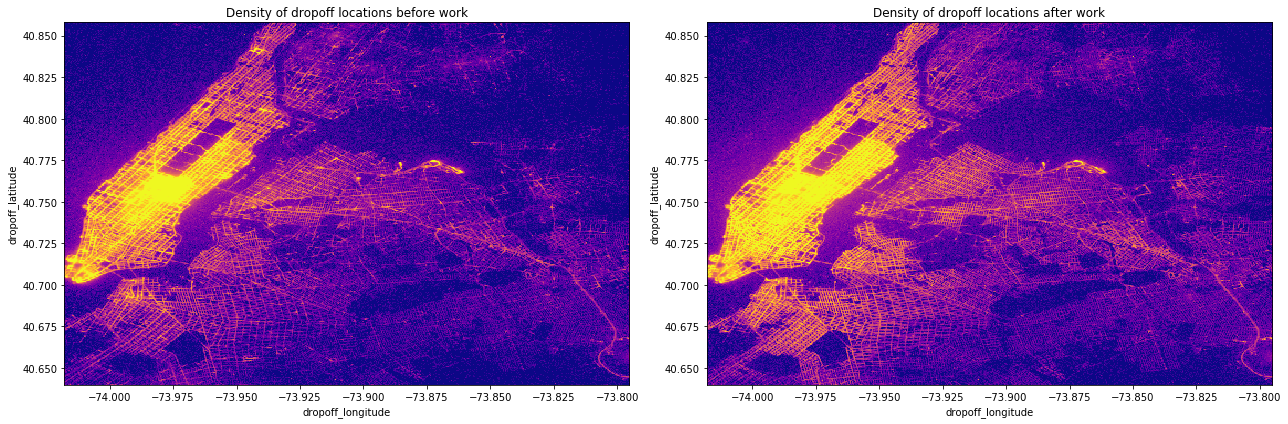

In [26]:
# Where do people go?
# Density map of dropoff locations (before & after work)
p.figure(figsize=(18, 6))

p.subplot(121)
df.plot(df.dropoff_longitude, df.dropoff_latitude,
        selection='(pu_hour>=6) & (pu_hour<9) & (pu_day_of_week<5)',
        colorbar=False, colormap='plasma', f='log1p', shape=512, vmin=0.0, vmax=9)
p.title('Density of dropoff locations before work')


p.subplot(122)
df.plot(df.dropoff_longitude, df.dropoff_latitude,
        selection='(pu_hour>=17) & (pu_hour<20) & (pu_day_of_week<5)',
        colorbar=False, colormap='plasma', f='log1p', shape=512, vmin=0.0, vmax=9)
p.title('Density of dropoff locations after work')

p.tight_layout()
p.show()

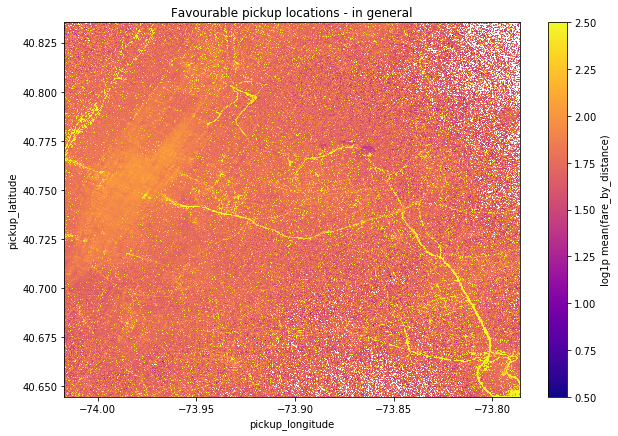

In [27]:
# Favourable pickup locations - best payout
p.figure(figsize=(9, 6))
df.plot(df.pickup_longitude, df.pickup_latitude, what='mean(fare_by_distance)', 
        colorbar=True, colormap='plasma', f='log1p', shape=512, vmin=0.5, vmax=2.5)
p.title('Favourable pickup locations - in general')
p.show()

### End of part 2